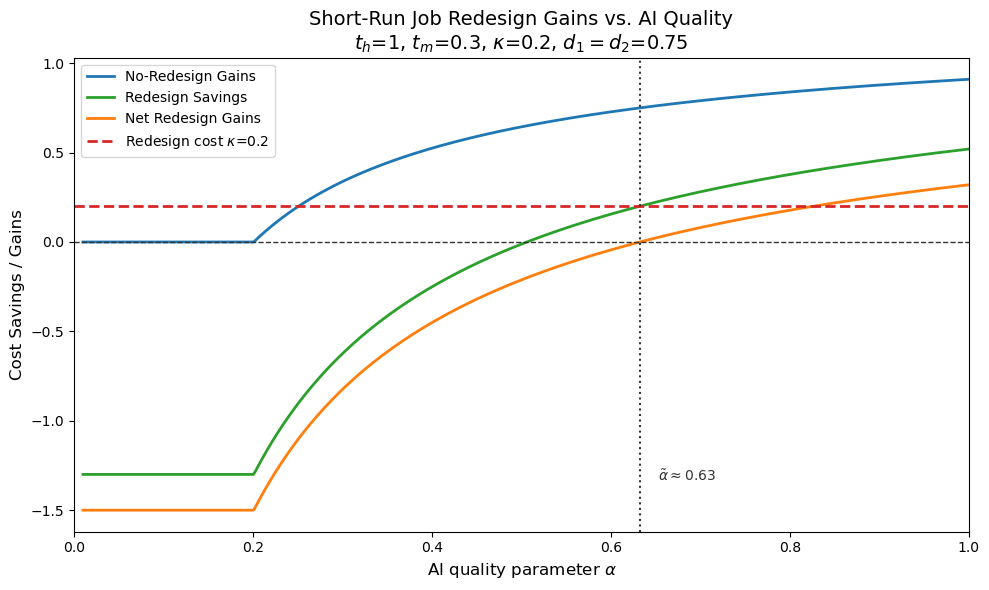

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETERS (example) ---
t_h   = 1.0      # human time cost per task
t_m   = 0.3      # machine management time per attempt
kappa = 0.2      # one-off redesign administrative cost per job changed
d     = 0.75     # fixed difficulty exponent: q_ij = alpha**d

# --- TASK & JOB SPECS ---
c = {1: 0.5, 2: 0.8}
t0 = {1: t_h, 2: t_h}
handoff0, handoff_star = 0.5, 0.0
J0, Jstar = [[1],[2]], [[1,2]]

def total_cost(design, c, t, handoff):
    tot = 0
    for job in design:
        h = sum(c[i] for i in job)
        T = sum(t[i] for i in job) + (len(job)-1)*handoff
        tot += h * T
    return tot

# Sweep alphas
alphas = np.linspace(0.01, 1.0, 500)
no_redesign  = np.zeros_like(alphas)
redesign_sav = np.zeros_like(alphas)
C0_old = total_cost(J0, c, t0, handoff0)

for i, alpha in enumerate(alphas):
    q = alpha**d
    t_ai = {1: min(t_h, t_m/q), 2: min(t_h, t_m/q)}
    no_redesign[i]  = C0_old - total_cost(J0,    c, t_ai, handoff0)
    redesign_sav[i] = C0_old - total_cost(Jstar, c, t_ai, handoff_star)

redesign_gain = redesign_sav - kappa
i_thresh      = np.argmin(np.abs(redesign_sav - kappa))
alpha_thresh  = alphas[i_thresh]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 6))

# Muted but distinct colors
ax.plot(alphas, no_redesign,   color='#1f77b4', lw=2, label='No‐Redesign Gains')     # muted blue
ax.plot(alphas, redesign_sav,  color='#2ca02c', lw=2, label='Redesign Savings')     # muted green
ax.plot(alphas, redesign_gain, color='#ff7f0e', lw=2, label='Net Redesign Gains')   # muted orange

# redesign cost line in dark red
ax.hlines(kappa, 0, 1, colors='#d62728', linestyles='--', lw=2, label=r'Redesign cost $\kappa$'+f'={kappa:.1f}')

# baseline
ax.hlines(0, 0, 1, colors='0.2', linestyles='--', lw=1)

# threshold line
ax.axvline(alpha_thresh, color='0.2', ls=':', lw=1.5)
ax.text(alpha_thresh+0.02, ax.get_ylim()[0] + 0.1*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        rf'$\tilde\alpha \approx {alpha_thresh:.2f}$',
        color='0.2', va='bottom')

ax.set_xlim(0, 1)
ax.set_xlabel(r'AI quality parameter $\alpha$', fontsize=12)
ax.set_ylabel('Cost Savings / Gains', fontsize=12)
ax.set_title('Short-Run Job Redesign Gains vs. AI Quality\n'
             r'$t_h$='f'{t_h:.0f}, '
             r'$t_m$='f'{t_m:.1f}, '
             r'$\kappa$='f'{kappa:.1f}, '
             r'$d_1=d_2$='f'{d:.2f}', fontsize=14)
ax.legend(loc='best')
plt.tight_layout()
plt.show()